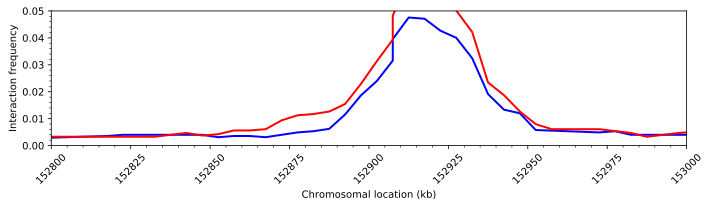

In [36]:
from __future__ import division
import os
import sys
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
plt.rcParams['pdf.fonttype'] = 42

%matplotlib inline
%config InlineBackend.figure_format='svg'

#find the coordinates for your chromosome in terminal wherever your hichip bed files are stored
#cat H9d7_hg38_10000_abs.bed | awk '$1mv=="chr4"' | head
#cat H9d7_hg38_10000_abs.bed  | awk '$1=="chr4"' | tail
#use the beginning and end coordinates to pull out the chromosome of interest from the matrix file
#cat *10000.matrix | awk '($1>=49117 && $1<=68946) && ($2>=49117 && $2<=68946)' > H9D7_10000_hg38.chr3.matrix
#python3 run_Mat2Bed.py -c 11 -k AHDC1_WT_10000_abs.bed -m WT_10000_hg38.chr4.matrix


###FOR NEW DATA 5kb bins:
#cat AHDC1_WT_5000_abs.bed | awk '$1mv=="chr3"' | head
#cat AHDC1_WT_5000_abs.bed  | awk '$1=="chr3"' | tail

#cat AHDC1_WT_5000.matrix | awk '($1>=98232 && $1<=137891) && ($2>=98232 && $2<=137891)' > AHDC1_WT_5000_hg38.chr3.matrix
#python3 run_Mat2Bed.py -c 11 -k AHDC1_WT_5000_abs.bed -m AHDC1_WT_5000_hg38.chr3.matrix

#cat AHDC1_KO_5000.matrix | awk '($1>=98232 && $1<=137891) && ($2>=98232 && $2<=137891)' > AHDC1_KO_5000_hg38.chr3.matrix
#python3 run_Mat2Bed.py -c 11 -k AHDC1_KO_5000_abs.bed -m AHDC1_KO_5000_hg38.chr3.matrix

####change the following block depending on your coordinates

#'PITX2':212790000

#anchor={'ZEB2':145280000}
#chromosome={'ZEB2':'chr2'}
#xlims=143600,147000
#ylims=0,0.03


#anchor={'KLF4':107490000}
#chromosome={'KLF4':'chr9'}
#xlims=107400,108900
#ylims=0,0.06


#anchor={'PITX2':111560000}
#chromosome={'PITX2':'chr4'}
#xlims=111300,113000
#ylims=0,0.01
#chrom='chr4'

#anchor={'NKX3-2':13540000}
#chromosome={'NKX3-2':'chr4'}
#xlims=12000,14000
#ylims=0,0.1
#chrom='chr4'

#anchor={'ABCA4':94580000}
#chromosome={'ABCA4':'chr1'}
#xlims=94400,95000
#ylims=0,0.2
#chrom='chr1'


#anchor={'WNT5A':55480000}
#chromosome={'WNT5A':'chr3'}
#xlims=55450,56400
#ylims=0,0.15

#anchor={'GREM2':240770000}
#chromosome={'GREM2':'chr1'}
#xlims=240550,241000
#ylims=0,0.03

#anchor={'GATA4':11560000}
#chromosome={'GATA4':'chr8'}
#xlims=11300,11900
#ylims=0,0.1


#anchor={'ATF3':212600000}
#chromosome={'ATF3':'chr1'}
#xlims=212400, 212800
#ylims=0,0.02

#anchor={'PITX2':110640000}
#chromosome={'PITX2':'chr4'}
#xlims=110550,112050
#ylims=0,0.02
#chrom='chr4'

#anchor={'DSG3':31445000}
#chromosome={'DSG3':'chr18'}
#xlims=31400,31500
#ylims=0,0.05
#chrom='chr18'

#anchor={'ALCAM':105370000}
#chromosome={'ALCAM':'chr3'}
#xlims=104000,106000
#ylims=0,0.02
#chrom='chr3'

anchor={'IVL':152905000}
chromosome={'IVL':'chr1'}
xlims=152800,153000
ylims=0,0.05
chrom='chr1'

###matrices are saved on a folder locally
#use "anncoll" for iMac and "anniecollier" for Macbook
savepath = '/Users/anncoll/Box/Ann_Collier/HiChIP/AHDC1_MATRIX'
matrix_path_d7 = '/Users/anncoll/Box/Ann_Collier/HiChIP/AHDC1_MATRIX'



#Define and do not change Resolution, smoothing window, and normalization factors
#norm_factor is # of reads from sequencing run (total)
resolution = 5000
win = 5
#norm_d7 = 324.7
norm_d7 = 450
norm_ko = 427

#Define chromosome
#change the name here depending on resolution
for key in chromosome:
    dg = pd.read_csv(os.path.join(matrix_path_d7, 'AHDC1_WT_5000_hg38.'+ str(chromosome[key]) + '.matrix.bed'), sep = '\t', header=None).reset_index()
    dh = pd.read_csv(os.path.join(matrix_path_d7, 'AHDC1_KO_5000_hg38.'+ str(chromosome[key]) + '.matrix.bed'), sep = '\t', header=None).reset_index()


for key in anchor:
    anchor = anchor[key]
    left_2 = dg[(dg[4] == anchor)][[1,6]].rename(columns={1:'position', 6:'counts'})
    right_2 = dg[(dg[1] == anchor)][[4,6]].rename(columns={4:'position', 6:'counts'})
    merge_2 = left_2.append(right_2, ignore_index=True).sort_values('position', ascending=True)
    merge_2['pos'] = (merge_2.position + resolution/2)/1000
    merge_2['norm'] = merge_2.counts/norm_d7
    left_3 = dh[(dh[4] == anchor)][[1,6]].rename(columns={1:'position', 6:'counts'})
    right_3 = dh[(dh[1] == anchor)][[4,6]].rename(columns={4:'position', 6:'counts'})
    merge_3 = left_3.append(right_3, ignore_index=True).sort_values('position', ascending=True)
    merge_3['pos'] = (merge_3.position + resolution/2)/1000
    merge_3['norm'] = merge_3.counts/norm_ko
    line2 = merge_2.norm.rolling(win, min_periods = 1).mean()
    line3 = merge_3.norm.rolling(win, min_periods = 1).mean()
    plt.figure(figsize=(10,3))
    plt.plot(merge_2.pos, line2, color='blue', linewidth=2)
    plt.plot(merge_3.pos, line3, color='red', linewidth=2)
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.xlabel('Chromosomal location (kb)')
    plt.ylabel('Interaction frequency')
    labels = plt.xticks()
    plt.xticks(rotation=45)
    plt.minorticks_on()
    plt.tight_layout()
    plt.savefig(os.path.join(savepath, key + 'H9d7_5000.'+ chrom + '_' + str(anchor) + '.matrix.pdf'))
    plt.show()
